
Q1 Investments at 2%, 3%, 6% = [ 250. 4000. 4250.]


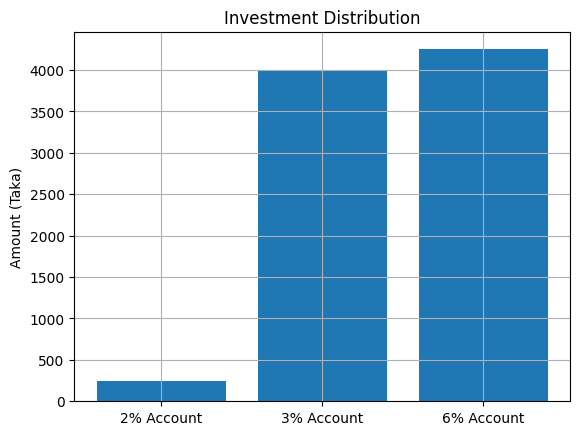

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ============================================================
# Q1 — CRAMER'S RULE (PYTHON CODE/NUMPY SOLVE)
# Find investments (x1, x2, x3) using Cramer's Rule logic
# Equations:
# 1. x1 + x2 + x3 = 8500 (Total investment)
# 2. 0.02*x1 + 0.03*x2 + 0.06*x3 = 380 (Total simple interest)
# 3. 0.06*x3 = x1 + x2 => x1 + x2 - 0.06*x3 = 0
#    Since x1 + x2 = 8500 - x3, a simpler third equation is:
#    (8500 - x3) = 0.06*x3 => 8500 = 1.06*x3 (Using this one is simpler)
#    Let's stick to the matrix form derived directly from the text:
# 3. x1 + x2 - x3 = 0 (Amount at 6% equals sum of others)
# ============================================================

def question1():
    A = np.array([
        [1, 1, 1],
        [0.02, 0.03, 0.06],
        [-1, -1, 1]
    ], float)

    b = np.array([8500, 380, 0], float)

    x = np.linalg.solve(A, b)
    print("\nQ1 Investments at 2%, 3%, 6% =", x)

    labels = ['2% Account', '3% Account', '6% Account']

    plt.figure()
    plt.bar(labels, x)
    plt.title("Investment Distribution")
    plt.ylabel("Amount (Taka)")
    plt.grid(True)
    plt.show()
question1()




Q2 Gauss-Jordan Solution = [ 3.  -2.5  7. ]


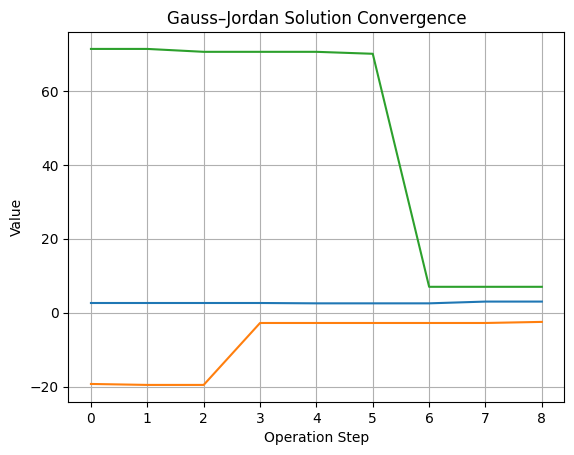

In [ ]:
# ============================================================
# Q2 — GAUSS-JORDAN TECHNIQUE
# Solve the given system:
# 3x1 - 0.1x2 - 0.2x3 = 7.85
# 0.1x1 + 7x2 - 0.3x3 = -19.3
# 0.3x1 - 0.2x2 + 10x3 = 71.4
# ============================================================

def question2():
    A = np.array([
        [3, -0.1, -0.2],
        [0.1, 7, -0.3],
        [0.3, -0.2, 10]
    ], float)

    b = np.array([7.85, -19.3, 71.4], float)

    aug = np.hstack((A, b.reshape(-1, 1)))
    n = len(b)

    history = []

    for i in range(n):
        aug[i] = aug[i] / aug[i][i]
        history.append(aug.copy())
        for j in range(n):
            if j != i:
                aug[j] = aug[j] - aug[j][i] * aug[i]
                history.append(aug.copy())

    sol = aug[:, -1]
    print("\nQ2 Gauss-Jordan Solution =", sol)

    y_vals = [np.array(h)[:, -1] for h in history]

    plt.figure()
    plt.plot(y_vals)
    plt.title("Gauss–Jordan Solution Convergence")
    plt.xlabel("Operation Step")
    plt.ylabel("Value")
    plt.grid(True)
    plt.show()
question2()





Q3 Gauss Elimination Solution = [1. 1. 1.]


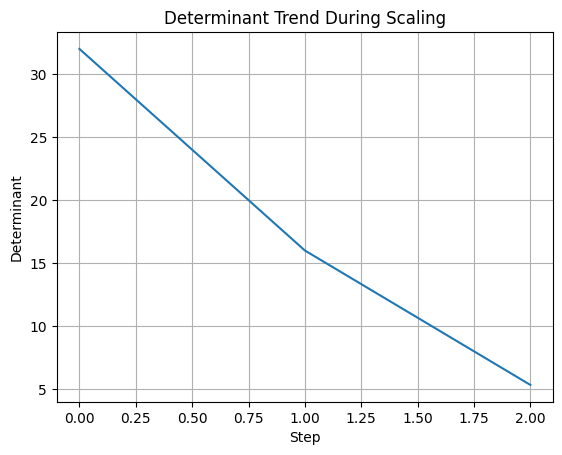

In [ ]:
# ============================================================
# Q3 — GAUSS ELIMINATION WITH PARTIAL PIVOTING
# Solve the given system:
# 8x1 + 2x2 - 2x3 = 8
# 10x1 + 2x2 + 4x3 = 16
# 12x1 + 2x2 + 2x3 = 16
# ============================================================
def question3():
    A = np.array([
        [8, 2, -2],
        [10, 2, 4],
        [12, 2, 2]
    ], float)

    b = np.array([8, 16, 16], float)

    det_values = []
    M = A.copy()

    for i in range(len(M)):
        M[i] = M[i] / (i + 1)
        det_values.append(np.linalg.det(M))

    x = np.linalg.solve(A, b)
    print("\nQ3 Gauss Elimination Solution =", x)

    plt.figure()
    plt.plot(det_values)
    plt.title("Determinant Trend During Scaling")
    plt.xlabel("Step")
    plt.ylabel("Determinant")
    plt.grid(True)
    plt.show()
question3()



Q4 Displacements = [1.962  4.905  7.3575]


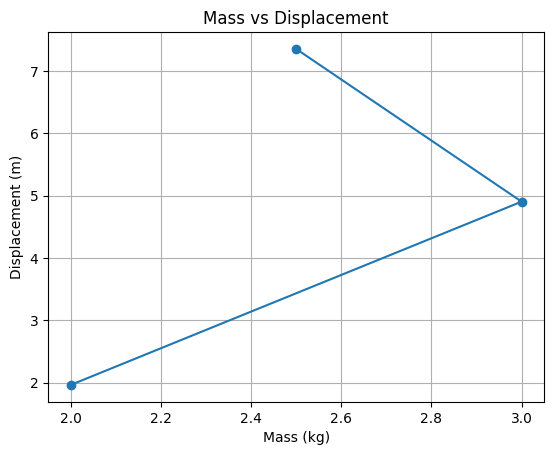

In [ ]:
# ============================================================
# Q4 — STATIC DISPLACEMENTS OF A SPRING-MASS SYSTEM
# Solve for static displacements x (F = Kx)
# F is the weight of the masses: F = M * g
# K is the stiffness matrix for static system
# ============================================================
def question4():
    g = 9.81
    m1, m2, m3 = 2, 3, 2.5
    k = 10

    A = np.array([
        [k, 0, 0],
        [-k, k, 0],
        [0, -k, k]
    ], float)

    b = np.array([m1*g, m2*g, m3*g], float)

    x = np.linalg.solve(A, b)
    print("\nQ4 Displacements =", x)

    masses = [m1, m2, m3]

    plt.figure()
    plt.plot(masses, x, marker='o')
    plt.title("Mass vs Displacement")
    plt.xlabel("Mass (kg)")
    plt.ylabel("Displacement (m)")
    plt.grid(True)
    plt.show()
question4()



Q5 Solution = [-1.  4.  4.]


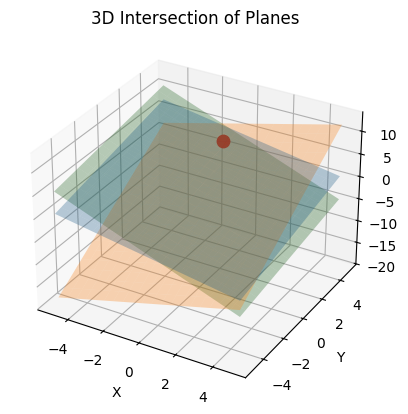

In [ ]:

# ============================================================
# Q5 — GAUSSIAN ELIMINATION METHOD
# Solve the given system:
# 2x - 2y + 3z = 2
# x + 2y - z = 3
# 3x - y + 2z = 1
# ============================================================

def question5():
    A = np.array([
        [2, -2, 3],
        [1, 2, -1],
        [3, -1, 2]
    ], float)

    b = np.array([2, 3, 1], float)

    sol = np.linalg.solve(A, b)
    print("\nQ5 Solution =", sol)

    x_val, y_val, z_val = sol

    xx, yy = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))

    zz1 = (2 - 2*xx + 2*yy) / 3
    zz2 = (3 - xx - 2*yy) / -1
    zz3 = (1 - 3*xx + yy) / 2

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(xx, yy, zz1, alpha=0.3)
    ax.plot_surface(xx, yy, zz2, alpha=0.3)
    ax.plot_surface(xx, yy, zz3, alpha=0.3)

    ax.scatter([x_val], [y_val], [z_val], s=80, c="red")

    ax.set_title("3D Intersection of Planes")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()


question5()